In [2]:
import tensorflow as tf

In [60]:
import cv2
import glob
import numpy as np
import random
import os

In [4]:
path = '/home/aditya/6thsem/deeplearning/ass1/images/'

In [5]:
print(path)

/home/aditya/6thsem/deeplearning/ass1/images/


In [6]:
class_number =-1
x_train =[]
y_train = []
x_test = []
y_test = []
for i in [0,1]: # length
    for t in [0,1]: #Thickness
        for k in range(0,12): #angle
            for o in [0,1]:
                rel_path = str(i)+'_'+str(t)+'_'+str(k)+'_'+str(o)
                count = 0
                class_number=class_number+1
               
                for f in glob.glob(path+rel_path+'/*.jpg'):
                    if count>=600 and count<1000:
                        count = count +1
                        x_test.append(cv2.imread(f))
                        y_test.append(class_number)
                    elif count<600 :
                        count= count+1
                        x_train.append(cv2.imread(f))
                        y_train.append(class_number)
#                         break
                    else:
                        break

In [7]:
from random import shuffle

rand_num = [i for i in range(len(x_train))]
# for i in range(0,10):
#     print(rand_num[i])

shuffle(rand_num)

# print(rand_num[len(rand_num)-1])
# for i in range(0,10):
#     print(rand_num[i])

x_train1 = []
y_train1 = []
for i in range(len(x_train)):
    x_train1.append(x_train[rand_num[i]])
    y_train1.append(y_train[rand_num[i]])

    
    
# x_train1 = np.asarray(x_train1)
# y_train1 = np.asarray(y_train1)

# print(len(x_train1))
# print(len(x_train[0]))
# print(len(y_train[0]))
# print(type(x_train1))
# print(type(y_train1))

# print(y_train[0])
#

x_train =  x_train1
y_train = y_train1

In [8]:

x_test = np.asarray(x_test)
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

y_train = tf.keras.utils.to_categorical(y_train,96)
y_test = tf.keras.utils.to_categorical(y_test,96)
#(x_train, y_train),(x_test, y_test) = mnist.load_data()
#x_train, x_test = x_train / 255.0, x_test / 255.0
print(len(x_train[0]))
print(len(y_train[0]))
print(type(x_train))

28
96
<class 'numpy.ndarray'>


In [9]:
# import matplotlib.pyplot as plt
# fig = plt.figure()
# for i in range(9):
#   plt.subplot(3,3,i+1)
#   plt.tight_layout()
#   plt.imshow(x_train[i], cmap='gray', interpolation='none')
#   plt.title("Digit: {}".format(y_train[i]))
#   plt.xticks([])
#   plt.yticks([])
# fig

In [10]:
# print(len(x_train))

In [11]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 3)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train/=255
x_test/=255


In [12]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
#   tf.keras.layers.Dense(512, activation=tf.nn.relu),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# ])

model = tf.keras.Sequential()
# model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Conv2D(filters=6,kernel_size=(6,6),padding='same', activation ='relu',input_shape = (28,28,3)))
model.add(tf.keras.layers.Conv2D(filters=12,kernel_size=(5,5),strides=(2, 2),padding='same', activation ='relu'))
model.add(tf.keras.layers.Conv2D(filters=24,kernel_size=(4,4),strides=(2, 2),padding='same', activation ='relu'))

# model.add(tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200,activation ='relu'))
# model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(96, activation ="softmax"))

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         654       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 12)        1812      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 24)          4632      
_________________________________________________________________
flatten (Flatten)            (None, 1176)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               235400    
_________________________________________________________________
dense_1 (Dense)              (None, 96)                19296     
Total params: 261,794
Trainable params: 261,794
Non-trainable params: 0
_________________________________________________________________


In [15]:
# from tensorflow.keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [16]:
history = model.fit(x_train, y_train,validation_split=0.05 ,epochs=1)
print(history.history)
model.evaluate(x_test, y_test)


Train on 54720 samples, validate on 2880 samples
Epoch 1/1
54720/54720 [==============================] - 39s 715us/step - loss: 1.2717 - acc: 0.6037 - val_loss: 0.4025 - val_acc: 0.8396
{'val_loss': [0.40249172945817313], 'val_acc': [0.8395833333333333], 'loss': [1.271729094103763], 'acc': [0.6037097953216374]}
38400/38400 [==============================] - 8s 214us/step


[0.38578925232207745, 0.8461458333333334]

In [17]:
########Getting outputs for intermediate convolution layers by running prediction on test image ##########

# print(model.layers)
# layer_outputs = [layer.output for layer in model.layers]
# print(layer_outputs)

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
layer_outputs = [layer.output for layer in model.layers]
# print(layer_outputs)
# print(x_test[2])
image_path  = '/home/aditya/6thsem/deeplearning/ass1/images/0_1_7_1/0_1_7_1_34.jpg'
image_name = '0_1_7_1_34'
# import PIL
# import PIL.Image

# test_image = x_test[2]

# img = image.load_img(image_path, target_size=(28,28))
# img_tensor = Image.img_to_array(img)
# img_tensor = np.expand_dims(img_tensor, axis=0)
# img_tensor /= 255.
img = cv2.imread(image_path)
print(img.shape)

activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img.reshape(1, 28, 28, 3))
print(len(activations[5]))
layer_names = ['conv2d', 'conv2d_1', 'conv2d_2']
activ_list = [activations[0], activations[1], activations[2]]

images_per_row = 3

for layer_name, layer_activation in zip(layer_names, activ_list):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='plasma')
    plt.savefig("viz/"+image_name+' - '+layer_name+"_grid.png", bbox_inches='tight',pad_inches=0.1,edgecolor='r')

(28, 28, 3)
1


In [18]:
def deprocess_image(x):
    
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

#---------------------------------------------------------------------------------------------------
#Utility function for generating patterns for given layer starting from empty input image and then 
#applying Stochastic Gradient Ascent for maximizing the response of particular filter in given layer
#---------------------------------------------------------------------------------------------------
# import keras.backend as K
%matplotlib
def generate_pattern(layer_name, filter_index, size=28):
    
    layer_output = model.get_layer(layer_name).output
    loss = tf.keras.backend.mean(layer_output[:, :, :, filter_index])
    grads = tf.keras.backend.gradients(loss, model.input)[0]
    grads /= (tf.keras.backend.sqrt(tf.keras.backend.mean(tf.keras.backend.square(grads))) + 1e-5)
    iterate = tf.keras.backend.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
#     + 128.
    step = 1.
    for i in range(80):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

layer_name = 'conv2d'

layer_output = model.get_layer(layer_name).output
print(layer_output[0])
print("layer name ", layer_name)
# print(layer_output[:, :, :, 0])
# cv2.imshow('',generate_pattern(layer_name, 0,28))


# fig=plt.figure(figsize=(6, 1))

# for i in range(0,6):
#     img = generate_pattern(layer_name, i,28)
# #     fig.add_subplot(i/3, i%3, i)
#     plt.imshow(img)
# plt.show()



# print(generate_pattern(layer_name, 0,28).shape)
# img1 = generate_pattern(layer_name, 1,28)
# img0 =generate_pattern(layer_name, 0,28)
# print(len(img0),len(img1))
# # imgplot = plt.imshow(img1)
# # imgplot1 = plt.imshow(img0)
# # plt.show()
# fig=plt.figure(figsize=(8, 8))
# columns = 4
# rows = 6
# for i in range(0, columns*rows +1):
#     img = generate_pattern(layer_name, i,7)
#     fig.add_subplot(rows, columns, i+1)
#     plt.imshow(img)
# plt.show()
# plt.savefig("results.png")

def gen_conv_op(conv_layer_name,rows,columns,kernel_size):
    fig=plt.figure(figsize=(20,20))
#     columns = 4
#     rows = 6
    for i in range(0, columns*rows):
        img = generate_pattern(conv_layer_name, i,kernel_size)
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img)
    plt.show()
    
    
# gen_conv_op('conv2d',2,3,28)
gen_conv_op('conv2d',2,3,28)

#------------------------------------------------------------------------------------------
#Generating convolution layer filters for intermediate layers using above utility functions
#------------------------------------------------------------------------------------------




Using matplotlib backend: Qt5Agg
Tensor("strided_slice:0", shape=(28, 28, 6), dtype=float32)
layer name  conv2d


In [71]:
def heatmap(pos):
    # image_path  = '/home/aditya/6thsem/deeplearning/ass1/images/0_1_7_1/0_1_7_1_34.jpg'
    # image_name = '0_1_7_1_34'

    img = x_test[pos]
    # print(img.shape)

    img = img.reshape(1, 28, 28, 3)

    # activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
    # activations = activation_model.predict(img.reshape(1, 28, 28, 3))


    preds = model.predict(img)
    # print(model.output_shape)
    flower_output = model.output[:,3]
    last_conv_layer = model.get_layer('conv2d')


    grads = tf.keras.backend.gradients(flower_output, last_conv_layer.output)[0]
    pooled_grads = tf.keras.backend.mean(grads,axis=(0, 1, 2))
    iterate = tf.keras.backend.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([img])
    # #96 is the number of filters/channels in 'mixed10' layer
    for i in range(6):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    # print(conv_layer_output_value.shape)    
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    # heatmap = heatmap.reshape(28,28,1)
    # print(heatmap.shape)
    heatmap = np.maximum(heatmap, 0)
    # print(heatmap.shape)
    heatmap /= np.max(heatmap)
    cv2.imwrite('heatmap.jpg',heatmap)
    # print(heatmap.shape)
    return x_test[pos],heatmap

# #Using cv2 to superimpose the heatmap on original image to clearly illustrate activated portion of image
# img1 = cv2.imread(img_path)
# heatmap = cv2.resize(heatmap, (img1.shape[1], img1.shape[0]))
# heatmap = np.uint8(255 * heatmap)
# heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
# superimposed_img = heatmap * 0.4 + img
# cv2.imwrite('superimposed_img.jpg', superimposed_img)



In [76]:
fig = plt.figure(figsize=(20,20))
plt.title('input image  ------>   output heatmap')
for i in range(0,12,2):
    inp,img = heatmap(random.randint(0,100))
    fig.add_subplot(6,2,i+1)
    plt.imshow(inp)
    fig.add_subplot(6,2,i+2)
    plt.imshow(img)
plt.show()
    

In [193]:
# from tensorflow.keras import backend as K

# inp = model.input                                           # input placeholder
# outputs = [layer.output for layer in model.layers]          # all layer outputs
# print(outputs)
# functor = K.function([inp, K.learning_phase()], outputs )   # evaluation function

# # Testing
# test = np.random.random((28,28,3))[np.newaxis,...]
# layer_outs = functor([test, 1.])
# print(len(layer_outs))


# print(x_train[0].shape)

In [148]:
y_pred = model.predict(x_test)

In [112]:
y_pred1 = []
  
y_pred1 =np.argmax(y_pred,axis=1) 
print(y_pred1)
# for i in y_pred1:
#     print(i)   
    
y_test = np.argmax(y_test,axis =1)
print(y_pred1)

[ 0  0  0 ... 95 95 95]
[ 0  0  0 ... 95 95 95]


In [113]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred1)
print(type(cf))


<class 'numpy.ndarray'>


In [114]:
import sys
from sklearn.metrics import f1_score
fscore = f1_score(y_test,y_pred1,average=None)
print(fscore)
np.set_printoptions(threshold=sys.maxsize)
# print(cf)
np.savetxt("line_cf2.csv", cf, delimiter=",")
np.savetxt("line_fscore2.csv", fscore, delimiter=",")

[0.98623279 0.93430657 0.988622   0.92772668 0.99502488 0.96009674
 1.         1.         1.         1.         0.99874844 0.95572917
 0.99875156 0.92575406 1.         0.94626474 1.         0.98636927
 1.         1.         0.9913259  0.96373057 0.98372966 0.92665037
 0.85917496 0.98263027 0.99874844 0.9975     1.         0.99875156
 0.96238651 0.99497487 0.95110024 0.91543624 0.96863237 0.92
 0.98280098 0.97493734 1.         0.97908979 0.99626401 0.98019802
 0.87061404 0.97984887 0.82969432 0.9729064  0.88839286 0.96267696
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1



dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


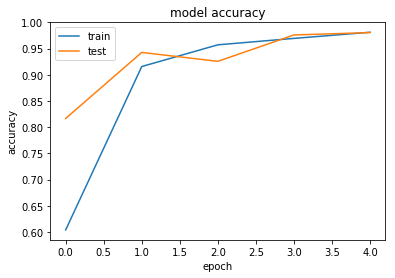

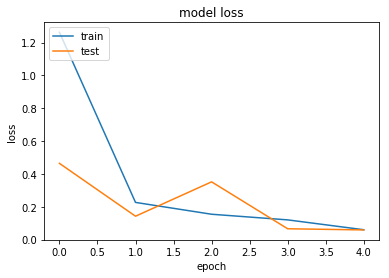

In [115]:
# history = model.fit(x=x_train,y=y_train, epochs=20, validation_split=0.33)
import matplotlib.pyplot as plt

# plot learning curves

print("\n")
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()